In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling ## For easy profiling of pandas DataFrame
import missingno as msno ## Missing value co-occurance analysis
sys.path.append(os.path.abspath("../src/"))
%matplotlib inline

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
 

In [2]:
from generic_data_exploration import *
from ml_classification import *

In [3]:
iris_dataset =pd.read_csv('../data/raw/Iris.csv',index_col='Id')

In [4]:
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
do_data_profiling(iris_dataset,'../reports/iris_data_profiling.html')

Data profiling done


In [7]:
do_simple_data_profiling(iris_dataset)

Missing Value
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
#missing_value_analysis(iris_dataset)

In [9]:
print_dataunique(iris_dataset)

0 SepalLengthCm float64 35 [5.1 4.9 4.7 4.6 5. ]
1 SepalWidthCm float64 23 [3.5 3.  3.2 3.1 3.6]
2 PetalLengthCm float64 43 [1.4 1.3 1.5 1.7 1.6]
3 PetalWidthCm float64 22 [0.2 0.4 0.3 0.1 0.5]
4 Species object 3 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


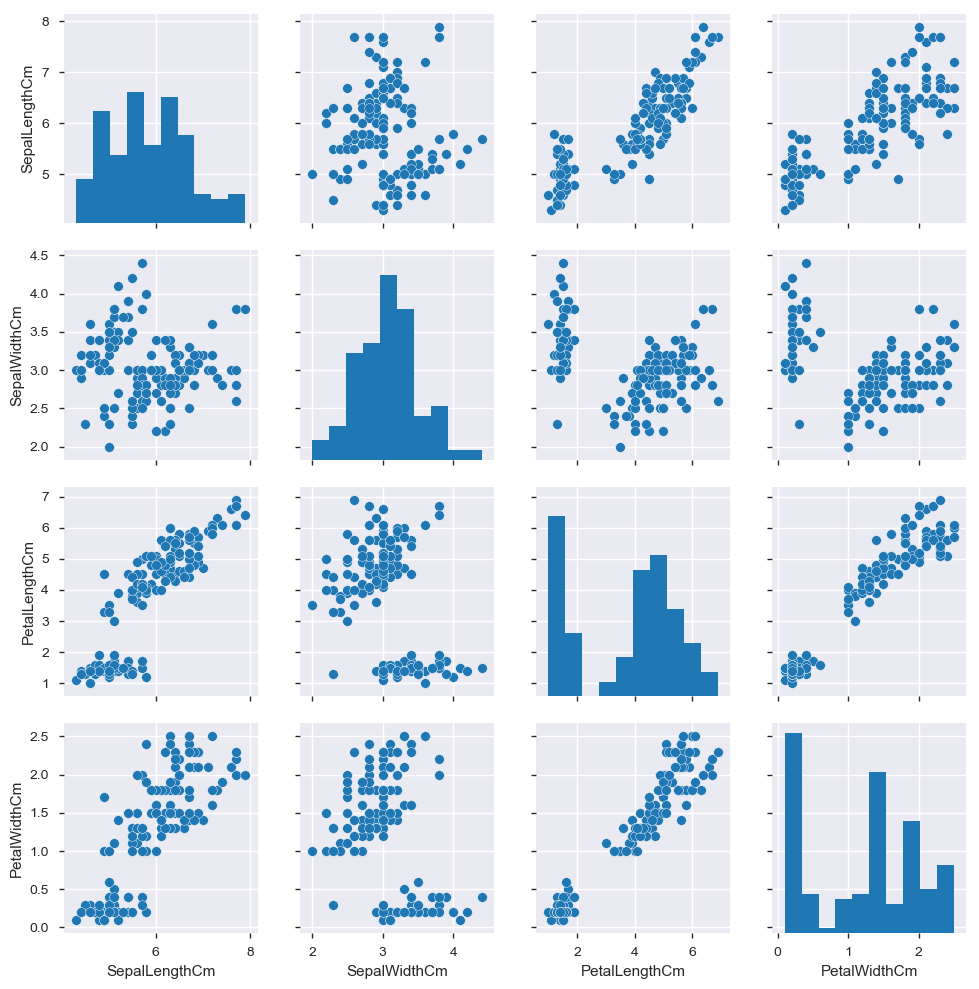

In [10]:
sns.pairplot(iris_dataset)

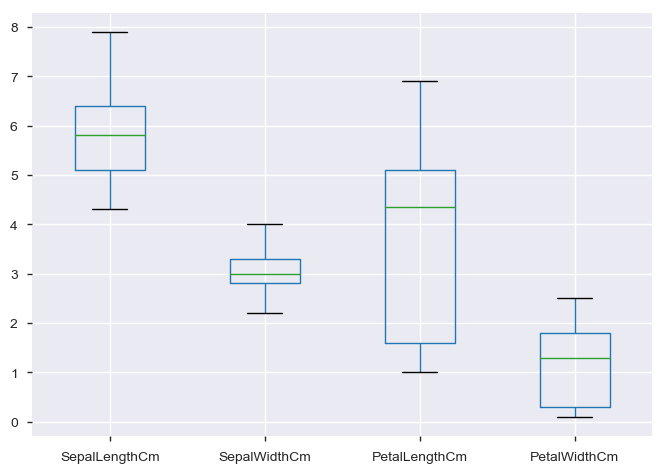

In [11]:
iris_dataset.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8F6378AC8>,
      dtype=object)

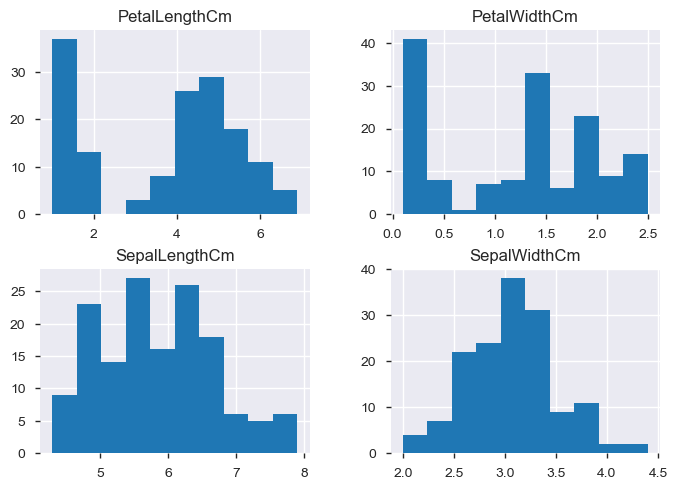

In [12]:
iris_dataset.hist()

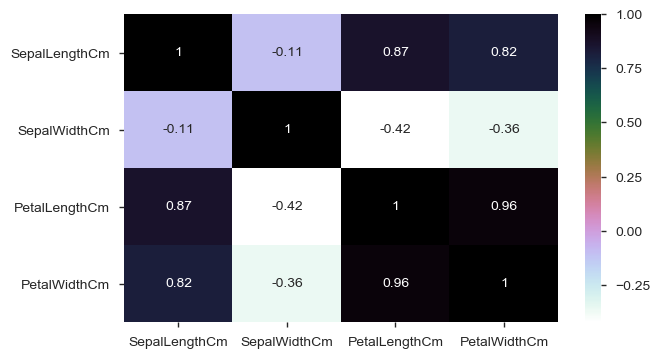

In [13]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [14]:
X=iris_dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris_dataset[['Species']]

In [15]:
## Creating hold-out CV
X_train, X_test, y_train, y_test = holdout_cv(X,y,size =0.3)
# X_train = X_train.reset_index(drop='index')
# X_test = X_test.reset_index(drop='index')

In [16]:
pred_y_test, loss,_,xgb_model = runXGBC(X_train.values, y_train, X_test.values, y_test,rounds=217)

Train and Test loss :  1.0 0.9555555555555556


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing

In [17]:
pred_y_test, loss,_,lgb_model = runLGBC(X_train.values, y_train, X_test.values, y_test)

Train and Test loss :  0.9238095238095239 0.9555555555555556


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing

In [18]:
### Running Extra Trees  
pred_y_test, loss,_,et_model = runET(X_train.values, y_train, X_test.values, y_test)

D:\2018\GIT\Projects\iris\src\ml_classification.py:231: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


Depth, leaf, feat :  20 10 0.2
Train and Test loss :  0.9333333333333333 0.8888888888888888


In [19]:
### Running Random Forest
pred_y_test, loss,_,rf_model = runRF(X_train.values, y_train, X_test.values, y_test)

D:\2018\GIT\Projects\iris\src\ml_classification.py:258: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


Train and Test loss :  0.9428571428571428 0.9555555555555556


In [20]:
### Running Logistic Regression
pred_y_test, loss,_,lr_model = runLR(X_train.values, y_train, X_test.values, y_test)

Train and Test loss :  0.9428571428571428 0.9333333333333333


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [21]:
### Running Decision Tree
pred_y_test, loss,_,dt_model = runDT(X_train.values, y_train, X_test.values, y_test)

Train and Test loss :  1.0 0.9555555555555556


In [22]:
### Running K-Nearest Neighbour
pred_y_test, loss,_,knn_model = runKNN(X_train.values, y_train, X_test.values, y_test)

D:\2018\GIT\Projects\iris\src\ml_classification.py:319: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(train_X, train_y)


Train and Test loss :  0.9523809523809523 0.9777777777777777


In [23]:
### Running SVM
pred_y_test, loss,_,svc_model = runSVC2(X_train.values, y_train, X_test.values, y_test,grid_search='Y')
#pred_y_test, loss,_,svc_model = runSVC1(X_train.values, y_train, X_test.values, y_test)

Train and Test loss :  0.9809523809523809 0.9777777777777777


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}
0.9809523809523809


In [24]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc_model, X = X_train, y = y_train.values.ravel(), cv = 10)
accuracies.mean()
accuracies.std()

0.04504869317369246

In [ ]:
svc_model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'min_samples_split':[1,2,10]}
clf = GridSearchCV(dt_model, param_grid=parameters, cv=10,n_jobs=3)

In [ ]:
clf.fit(X_train, y_train.values.ravel())

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
print(clf.best_params_)